In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [2]:
rre = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Riga%20real%20estate%20dataset/riga_re.csv")
rre.head()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042


In [3]:
nRow, nCol = rre.shape
print(f'There are {nRow} rows and {nCol} columns in this dataset')

There are 4689 rows and 13 columns in this dataset


In [4]:
print(f'Column names: \n{rre.columns}')

Column names: 
Index(['op_type', 'district', 'street', 'rooms', 'area', 'floor',
       'total_floors', 'house_seria', 'house_type', 'condition', 'price',
       'lat', 'lon'],
      dtype='object')


In [5]:
rre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   op_type       4689 non-null   object 
 1   district      4674 non-null   object 
 2   street        4237 non-null   object 
 3   rooms         4500 non-null   object 
 4   area          4325 non-null   float64
 5   floor         4356 non-null   float64
 6   total_floors  4345 non-null   float64
 7   house_seria   4247 non-null   object 
 8   house_type    4239 non-null   object 
 9   condition     4283 non-null   object 
 10  price         4219 non-null   float64
 11  lat           4482 non-null   float64
 12  lon           4482 non-null   float64
dtypes: float64(6), object(7)
memory usage: 476.4+ KB


In [6]:
rre.describe()

,area,floor,total_floors,price,lat,lon
count,4325.000000,4356.000000,4345.000000,4219.000000,4482.000000,4482.000000
mean,61.204557,4.552342,6.160184,58728.706803,55.831982,22.303814
std,36.089986,8.565853,4.326098,76252.501519,3.255038,8.571356
min,1.000000,1.000000,1.000000,5.000000,46.314475,-100.708194
25%,39.000000,2.000000,5.000000,450.000000,56.936154,24.065920
50%,53.000000,3.000000,5.000000,40000.000000,56.952443,24.122890
75%,75.000000,5.000000,7.000000,82000.000000,56.963540,24.168477
max,427.000000,99.000000,99.000000,830000.000000,59.347471,24.340866


In [7]:
print(f'Column names: \n{rre.columns}')

Column names: 
Index(['op_type', 'district', 'street', 'rooms', 'area', 'floor',
       'total_floors', 'house_seria', 'house_type', 'condition', 'price',
       'lat', 'lon'],
      dtype='object')


In [8]:
print(f'Also I am deleting Nan values:')
rre = rre.dropna(subset=['op_type','district','rooms','area','floor','total_floors','house_type','price'])
rre.head(2)

Also I am deleting Nan values:


,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350


In [9]:
print(f'I checked what values are in the numeric columns and I see that there is a word "Citi" (in Latvian "Other") among the values in the "rooms" column - only 14 entries, so I will continue to use data without this value.')
rre['rooms'].value_counts()

I checked what values are in the numeric columns and I see that there is a word "Citi" (in Latvian "Other") among the values in the "rooms" column - only 14 entries, so I will continue to use data without this value.


2       1463
3       1179
1       1082
4        351
5         94
6         26
Citi      14
Name: rooms, dtype: int64

In [10]:
rre = rre[rre.rooms != "Citi"]

In [11]:
print(f'Need to change data type in columns "rooms", "floor","total_floors" and "area" from float to integer.')
rre['rooms'] = rre['rooms'].astype('int')
rre['area'] = rre['area'].astype('int')
rre['floor'] = rre['floor'].astype('int')
rre['total_floors'] = rre['total_floors'].astype('int')
rre.head(2)

Need to change data type in columns "rooms", "floor","total_floors" and "area" from float to integer.


,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27,3,5,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50,7,9,602.,Panel,All amenities,300.0,56.899798,24.098350


In [12]:
print(f'I also want the information about the floor of the object and how many floors there are to be in one column. \nI am creating a new column "Floor_total".')

def floor_total(s):
    return str(s['floor']) + " / " + str(s['total_floors'])
floor_total(rre.iloc[1])
rre.apply(floor_total, axis='columns')

I also want the information about the floor of the object and how many floors there are to be in one column. 
I am creating a new column "Floor_total".


0        3 / 5
1        7 / 9
2        1 / 2
3        5 / 5
4       3 / 12
         ...  
4684     4 / 5
4685     2 / 5
4686     5 / 5
4687     1 / 2
4688     4 / 6
Length: 4195, dtype: object

In [13]:
rre['floor_total'] = rre.apply(floor_total, axis='columns')
print(f'Also I am creating a new column with square meter price and name it "sqm_price":')
rre['sqm_price']=round(rre['price'] / rre['area'])
rre['price']=round(rre['price'],2)  
rre.head(2)

Also I am creating a new column with square meter price and name it "sqm_price":


,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon,floor_total,sqm_price
0,For rent,Purvciems,Dzelzavas 93,1,27,3,5,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139,3 / 5,9.0
1,For rent,Ziepniekkalns,Ozolciema 32,2,50,7,9,602.,Panel,All amenities,300.0,56.899798,24.098350,7 / 9,6.0


In [14]:
print(f'I see that there are mostly  For sale" and "For rent" operation type.')
print(f'So I will use only data of these to operation types, because the other are insignificant:')
rre['op_type'].value_counts()

I see that there are mostly  For sale" and "For rent" operation type.
So I will use only data of these to operation types, because the other are insignificant:


For sale    2666
For rent    1522
Other          4
Change         2
Renting        1
Name: op_type, dtype: int64

In [15]:
rre = rre[rre['op_type'].isin(['For sale','For rent'])]
For_sale = rre[rre['op_type'] == 'For sale']
For_rent = rre[rre['op_type'] == 'For rent']

In [16]:
pd.isnull(rre).sum()

op_type           0
district          0
street            0
rooms             0
area              0
floor             0
total_floors      0
house_seria       0
house_type        0
condition         0
price             0
lat             205
lon             205
floor_total       0
sqm_price         0
dtype: int64

In [17]:
print(f'Data is cleaned!')

Data is cleaned!


In [18]:
print(f'How many unique values has each column:')
rre.nunique() 

How many unique values has each column:


op_type            2
district          48
street          2513
rooms              6
area             197
floor             22
total_floors      25
house_seria       15
house_type         6
condition          3
price           1050
lat             2073
lon             2075
floor_total      165
sqm_price       1353
dtype: int64

In this graph we see how many objects are for sale and how many for rent:


Text(0, 0.5, 'Quantity')

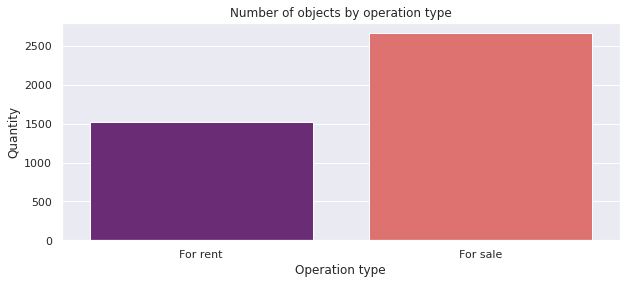

In [19]:
print(f'In this graph we see how many objects are for sale and how many for rent:')
sns.set_theme()  
plt.figure(figsize=(10,4))
ax = sns.countplot(x="op_type", data=rre, palette = 'magma')

ax.set_title ("Number of objects by operation type")
ax.set_xlabel ("Operation type")
ax.set_ylabel ("Quantity")

In [20]:
max_district = rre['district'].value_counts().idxmax()
max_rooms = rre['rooms'].value_counts().idxmax()
max_area = rre['area'].value_counts().idxmax()
max_floor = rre['floor'].value_counts().idxmax()
max_house_type = rre['house_type'].value_counts().idxmax()
print(f'The most popular district:        {max_district}') 
print(f'The most popular number of rooms: {max_rooms}') 
print(f'The most popular area:            {max_area}') 
print(f'The most popular floor:           {max_floor}') 
print(f'The most popular house type:      {max_house_type}') 

The most popular district:        centrs
The most popular number of rooms: 2
The most popular area:            50
The most popular floor:           2
The most popular house type:      Masonry


In [21]:
price_for_sale_min = rre[rre['op_type']=='For sale']['price'].min()
print(f'The lowest price for sale:  {round(price_for_sale_min)}')
price_for_sale_mean = rre[rre['op_type']=='For sale']['price'].mean()
print(f'Average price for sale:     {round(price_for_sale_mean)}')
price_for_sale_max = rre[rre['op_type']=='For sale']['price'].max()
print(f'The highest price for sale: {round(price_for_sale_max)}')
print()
price_for_rent_min = rre[rre['op_type']=='For rent']['price'].min()
print(f'The lowest price for rent:   {round(price_for_rent_min)}')
price_for_rent_mean = rre[rre['op_type']=='For rent']['price'].mean()
print(f'Average price for rent:      {round(price_for_rent_mean)}')
price_for_rent_max = rre[rre['op_type']=='For rent']['price'].max()
print(f'The highest price for rent:  {round(price_for_rent_max)}')
print()

The lowest price for sale:  5000
Average price for sale:     91483
The highest price for sale: 830000

The lowest price for rent:   5
Average price for rent:      426
The highest price for rent:  3500



Text(0.5, 1.0, 'Price for rent')

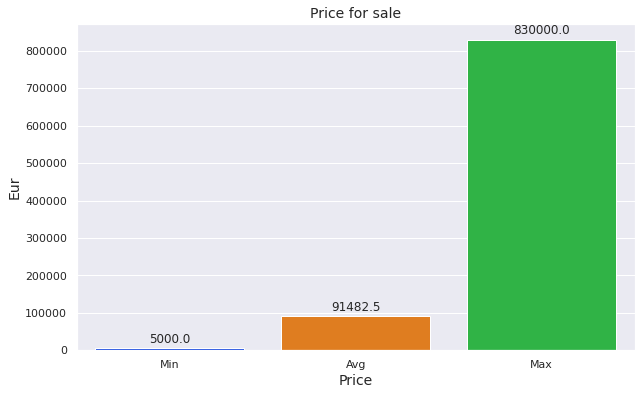

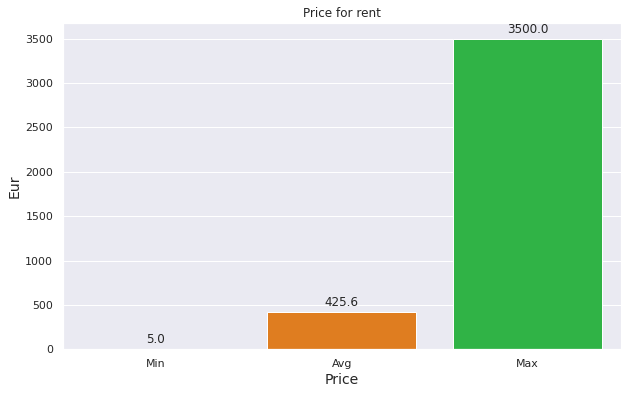

In [22]:
min_avg_max = pd.DataFrame([[price_for_sale_min, price_for_sale_mean, price_for_sale_max],[price_for_rent_min, price_for_rent_mean, price_for_rent_max]], columns=['Min', 'Avg','Max'], index=['For sale', 'For rent'])
min_avg_max = min_avg_max.round()

fs = pd.DataFrame([[price_for_sale_min, price_for_sale_mean, price_for_sale_max]], columns=['Min', 'Avg','Max'], index=['For sale'])
fs = fs.T

fr = pd.DataFrame([[price_for_rent_min, price_for_rent_mean, price_for_rent_max]], columns=['Min', 'Avg','Max'], index=['For rent'])
fr = fr.T
Price =['Min', 'Avg','Max']
Eur =[price_for_sale_min, price_for_sale_mean, price_for_sale_max]

df = pd.DataFrame({"Price":Price, "Eur":Eur})
df

plt.figure(figsize=(10, 6))
splot=sns.barplot(x="Price",y="Eur",data=df, palette = 'bright')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Price", size=14)
plt.ylabel("Eur", size=14)
plt.title("Price for sale", size = 14)


Price =['Min', 'Avg','Max']
Eur =[price_for_rent_min, price_for_rent_mean, price_for_rent_max]

df = pd.DataFrame({"Price":Price, "Eur":Eur})
df

plt.figure(figsize=(10, 6))
splot=sns.barplot(x="Price",y="Eur",data=df, palette = 'bright')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Price", size=14)
plt.ylabel("Eur", size=14)
plt.title("Price for rent")

Text(0.5, 1.0, 'Price for rent')

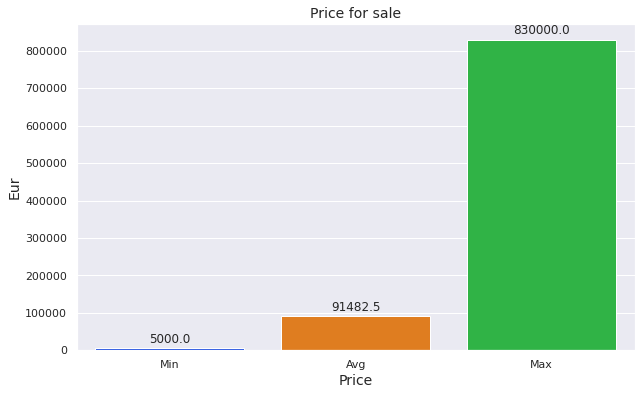

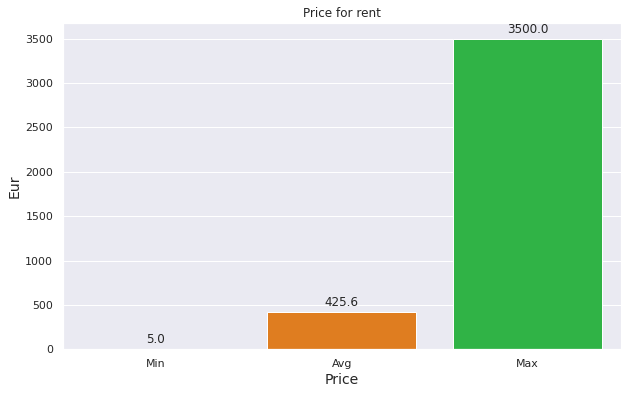

In [23]:
min_avg_max = pd.DataFrame([[price_for_sale_min, price_for_sale_mean, price_for_sale_max],[price_for_rent_min, price_for_rent_mean, price_for_rent_max]], columns=['Min', 'Avg','Max'], index=['For sale', 'For rent'])
min_avg_max = min_avg_max.round()

fs = pd.DataFrame([[price_for_sale_min, price_for_sale_mean, price_for_sale_max]], columns=['Min', 'Avg','Max'], index=['For sale'])
fs = fs.T

fr = pd.DataFrame([[price_for_rent_min, price_for_rent_mean, price_for_rent_max]], columns=['Min', 'Avg','Max'], index=['For rent'])
fr = fr.T
Price =['Min', 'Avg','Max']
Eur =[price_for_sale_min, price_for_sale_mean, price_for_sale_max]

df = pd.DataFrame({"Price":Price, "Eur":Eur})
df

plt.figure(figsize=(10, 6))
splot=sns.barplot(x="Price",y="Eur",data=df, palette = 'bright')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Price", size=14)
plt.ylabel("Eur", size=14)
plt.title("Price for sale", size = 14)


Price =['Min', 'Avg','Max']
Eur =[price_for_rent_min, price_for_rent_mean, price_for_rent_max]

df = pd.DataFrame({"Price":Price, "Eur":Eur})
df

plt.figure(figsize=(10, 6))
splot=sns.barplot(x="Price",y="Eur",data=df, palette = 'bright')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Price", size=14)
plt.ylabel("Eur", size=14)
plt.title("Price for rent")

This graph confirms the assumption that the price will increase as the number of rooms increases, which usually means a larger living space.


Text(0, 0.5, 'Price Eur')

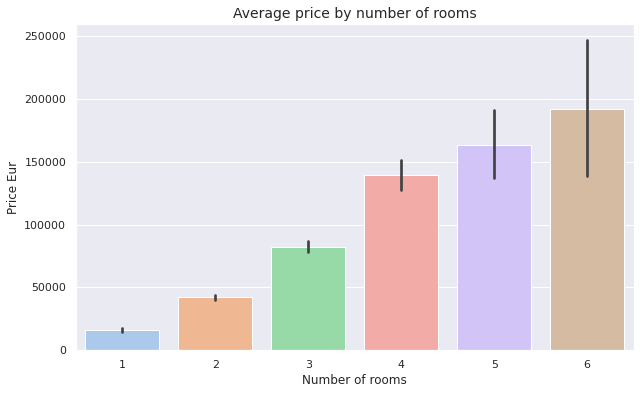

In [24]:
print(f'This graph confirms the assumption that the price will increase as the number of rooms increases, which usually means a larger living space.')
      
line,ax = plt.subplots(figsize=(10,6))
rre.groupby('rooms').price.mean()                                           
sns.barplot(data=rre, x="rooms", y="price", palette='pastel')
plt.title("Average price by number of rooms", size=14)
plt.xlabel("Number of rooms")
plt.ylabel("Price Eur")

There are 48 districts in the dataset
Number of objects by district
The largest number of objects is offered in the center.


Text(0, 0.5, 'Number of objects')

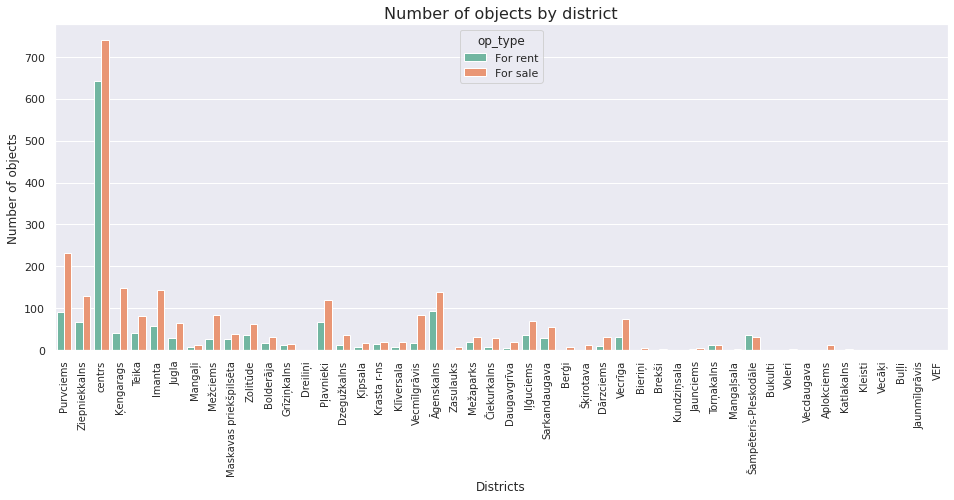

In [25]:
unique_district_len=len(rre['district'].unique())
print(f'There are {unique_district_len} districts in the dataset') 
print(f'Number of objects by district')
print(f'The largest number of objects is offered in the center.')
line,ax = plt.subplots(figsize=(16,6))
sns.countplot(data = rre, x='district', hue = 'op_type', palette = 'Set2')
plt.xticks(rotation=90, size = 10)
ax.set_title ("Number of objects by district", size = 16)
ax.set_xlabel ("Districts")
ax.set_ylabel ("Number of objects")

In these graphs we see that the highest average selling price is in Klīversala, Kīpsala, Bukulti districts,
but the rental price in Klīversala district is quite low. Therefore, if you think about earning rent, it really doesnt worth, because the return on rent will be small.
However, as we can see from the graph above, VEF has the lowest supply (only 2 objects). So, this amount of data is not sufficient to make an objective assumptions.


Text(0, 0.5, 'Price Eur')

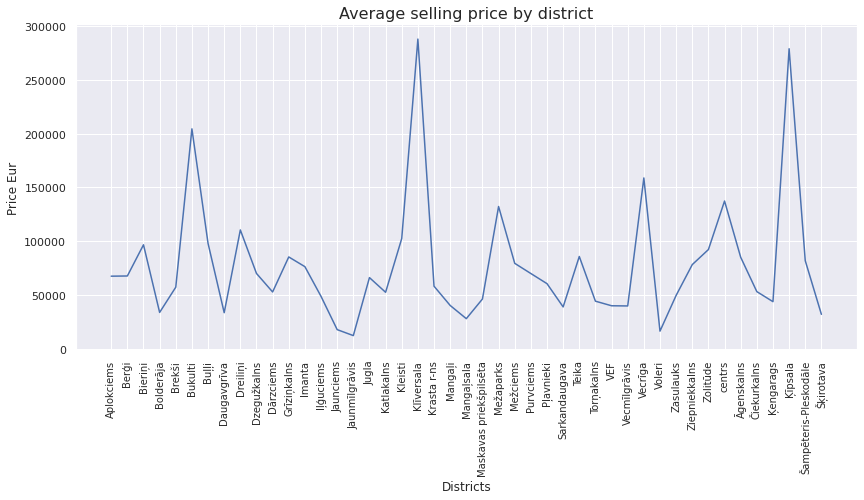

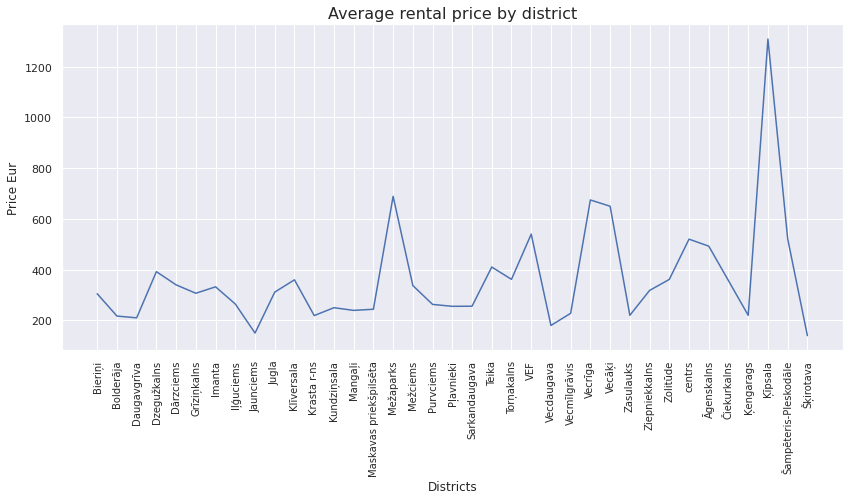

In [26]:
print(f'In these graphs we see that the highest average selling price is in Klīversala, Kīpsala, Bukulti districts,\nbut the rental price in Klīversala district is quite low. Therefore, if you think about earning rent, it really doesnt worth, because the return on rent will be small.') 
print(f'However, as we can see from the graph above, VEF has the lowest supply (only 2 objects). So, this amount of data is not sufficient to make an objective assumptions.')
avgpriceforsale = For_sale.groupby('district').price.mean()
avgpriceforrent = For_rent.groupby('district').price.mean()

line,ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=avgpriceforsale, palette = "hls")
plt.xticks(rotation=90, size = 10)
ax.set_title ("Average selling price by district", size = 16)
ax.set_xlabel ("Districts", size = 12)
ax.set_ylabel ("Price Eur", size = 12)

line,ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=avgpriceforrent, palette = "hls")
plt.xticks(rotation=90, size = 10)
ax.set_title ("Average rental price by district", size = 16)
ax.set_xlabel ("Districts", size = 12)
ax.set_ylabel ("Price Eur", size = 12)

In [27]:
print(f'The following table shows the prices of dwellings for sale and for rent and the number of objects by type of house:')
grouped_by_optype_and_housetype = rre.groupby(['op_type', 'house_type'])['price'].agg([min, max, len]).rename(columns={'len': 'Number of objects'})
grouped_by_optype_and_housetype

The following table shows the prices of dwellings for sale and for rent and the number of objects by type of house:


min       max  Number of objects
op_type  house_type                                       
For rent Brick            5.0    2500.0                363
         Brick-Panel     20.0    1500.0                175
         Masonry          5.0    2900.0                502
         Panel           15.0    3500.0                349
         Panel-Brick     25.0    1400.0                 84
         Wood            25.0    2200.0                 49
For sale Brick         5300.0  399000.0                490
         Brick-Panel  11000.0  460000.0                260
         Masonry       5000.0  830000.0                810
         Panel        12900.0  399990.0                845
         Panel-Brick  12000.0  618995.0                121
         Wood          5500.0  275000.0                140

Masonry, Brick and Panel houses are the most offered.
Wood and Panel-Brick are the least available.


Text(0, 0.5, 'Objects')

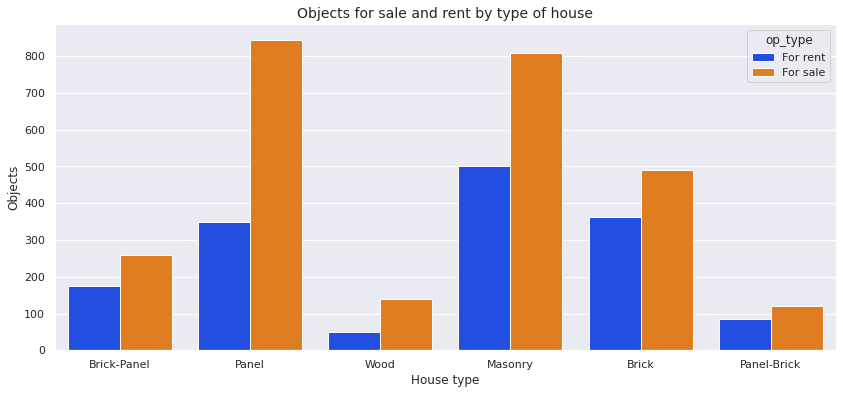

In [28]:
print(f'Masonry, Brick and Panel houses are the most offered.\nWood and Panel-Brick are the least available.')
line,ax = plt.subplots(figsize=(14,6))                                                         
sns.countplot(data=rre, x='house_type', hue='op_type', palette = 'bright')
plt.title("Objects for sale and rent by type of house", size = 14)
ax.set_xlabel ("House type")
ax.set_ylabel ("Objects")

In [29]:
print(f'Average price by house type:')
round(rre.groupby(['op_type', 'house_type'])['price'].mean(),2)

Average price by house type:


op_type   house_type 
For rent  Brick             376.20
          Brick-Panel       378.89
          Masonry           551.67
          Panel             334.23
          Panel-Brick       404.14
          Wood              354.22
For sale  Brick           71594.57
          Brick-Panel     91118.52
          Masonry        135348.68
          Panel           65742.83
          Panel-Brick    122512.53
          Wood            36508.17
Name: price, dtype: float64

Masonry house type is the most expensive and Wood house is the cheapest to sell. In the rental supply the most expensive is Masonry house type, but the cheapest Panel house type. 


Text(0, 0.5, 'Price Eur')

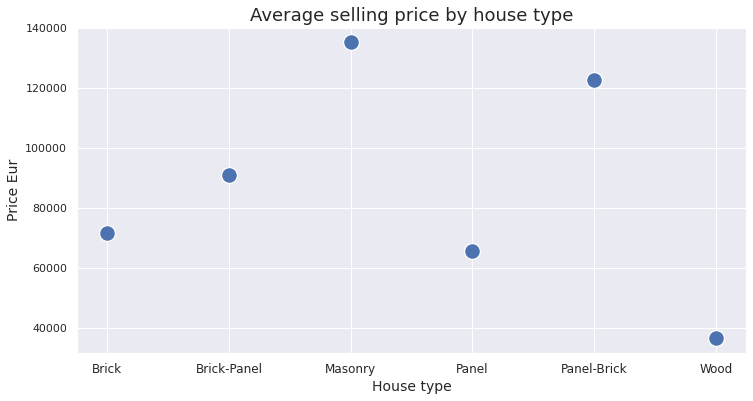

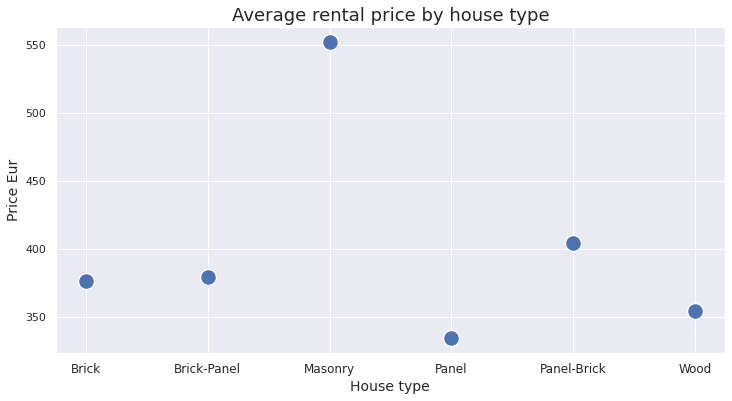

In [30]:
print(f'Masonry house type is the most expensive and Wood house is the cheapest to sell. In the rental supply the most expensive is Masonry house type, but the cheapest Panel house type. ')

house_type_by_price_for_sale = round(For_sale.groupby('house_type')['price'].mean())

line,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=house_type_by_price_for_sale, s=250)  # s=250 -> changing dot size
plt.xticks(size = 12)
ax.set_title ("Average selling price by house type", size = 18)
ax.set_xlabel ("House type", size = 14)
ax.set_ylabel ("Price Eur", size = 14)

house_type_by_price_for_rent = round(For_rent.groupby('house_type')['price'].mean())

line,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=house_type_by_price_for_rent, s=250)  # s=250 -> changing dot size
plt.xticks(size = 12)
ax.set_title ("Average rental price by house type", size = 18)
ax.set_xlabel ("House type", size = 14)
ax.set_ylabel ("Price Eur", size = 14)

Here is the average price per square meter by house type.
We see that the highest is the price of Masonry and Panel-Brick house types for sale and the lowest is the price of Wood house type.
The highest rental price is also for Masonry and Panel-Brick house types, and the lowest is for Wood and Panel.


Text(0, 0.5, 'House type')

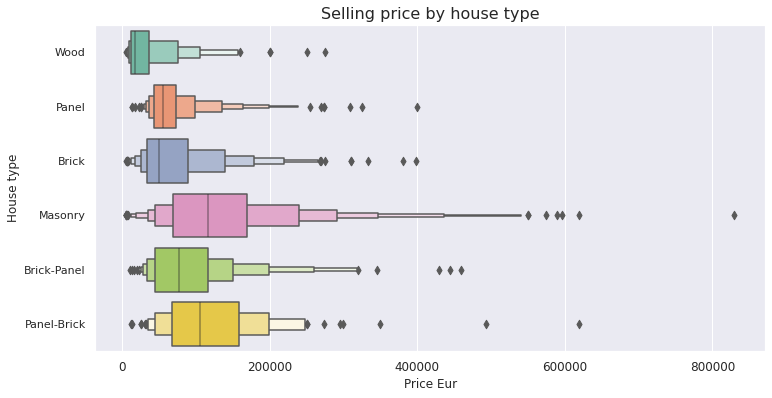

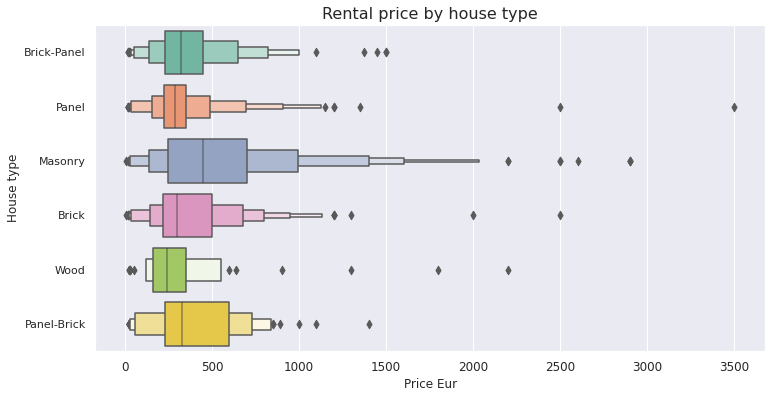

In [31]:
print(f'Here is the average price per square meter by house type.')
print(f'We see that the highest is the price of Masonry and Panel-Brick house types for sale and the lowest is the price of Wood house type.')
line,ax = plt.subplots(figsize=(12,6))
sns.boxenplot(data=For_sale, x='price', y='house_type', palette = 'Set2')  
plt.xticks(size = 12)
ax.set_title ("Selling price by house type", size = 16)
ax.set_xlabel ("Price Eur", size = 12)
ax.set_ylabel ("House type", size = 12)

print(f'The highest rental price is also for Masonry and Panel-Brick house types, and the lowest is for Wood and Panel.')
line,ax = plt.subplots(figsize=(12,6))
sns.boxenplot(data=For_rent, x='price', y='house_type', palette = 'Set2')  
plt.xticks(size = 12)
ax.set_title ("Rental price by house type", size = 16)
ax.set_xlabel ("Price Eur", size = 12)
ax.set_ylabel ("House type", size = 12)

Here is another way to display the average price and the number of objects for each type of house:


Text(0.5, 0.98, 'Objects for rent')

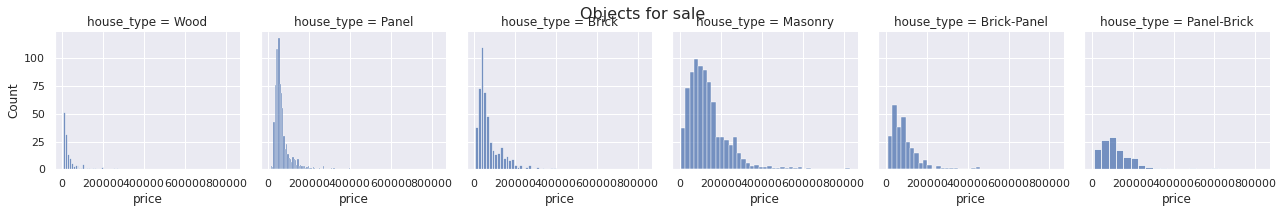

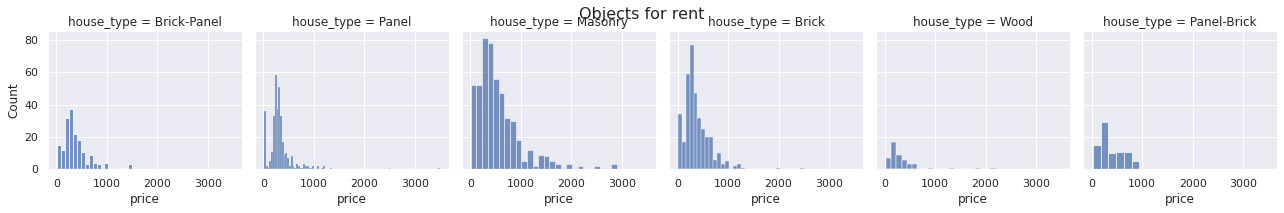

In [32]:
print(f'Here is another way to display the average price and the number of objects for each type of house:')
g = sns.FacetGrid(For_sale, col="house_type")
g.map(sns.histplot, "price")
g.set_axis_labels("price", "Count")
g.fig.suptitle("Objects for sale", size = 16)

g = sns.FacetGrid(For_rent, col="house_type")
g.map(sns.histplot, "price")
g.set_axis_labels("price", "Count")
g.fig.suptitle("Objects for rent", size = 16)

I also want to see what the sale prices are by house type and floor
We see that dominate Brick-Panel and Panel-Brick on the 1st - 6th floors up to about 250,000 Eur and Masonry houses from about 180,000 Eur to 400,000 Eur 


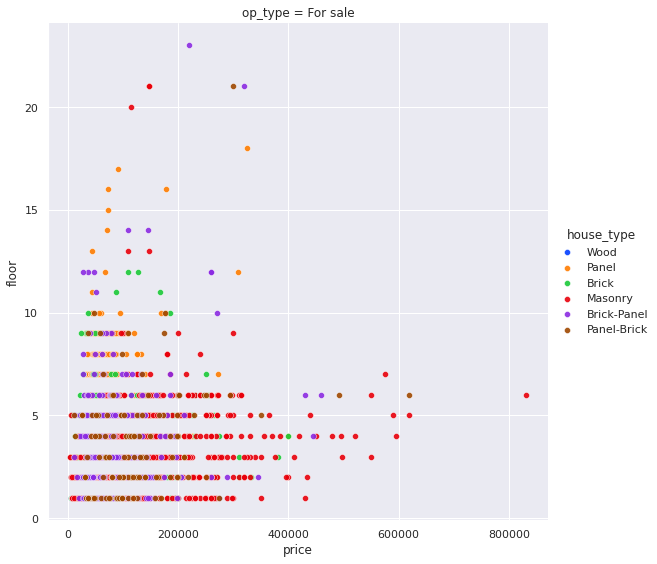

In [33]:
print(f'I also want to see what the sale prices are by house type and floor')
g = sns.FacetGrid(For_sale, col="op_type", hue="house_type", height=8,  aspect=.99, palette ='bright')
g.map(sns.scatterplot, "price", "floor", alpha=.9)
g.add_legend()
print(f'We see that dominate Brick-Panel and Panel-Brick on the 1st - 6th floors up to about 250,000 Eur and Masonry houses from about 180,000 Eur to 400,000 Eur ')

In the rental supply the most objects are in Brick and Panel_Brick houses on the 1st to 9th floor with price up to 700 Eur.


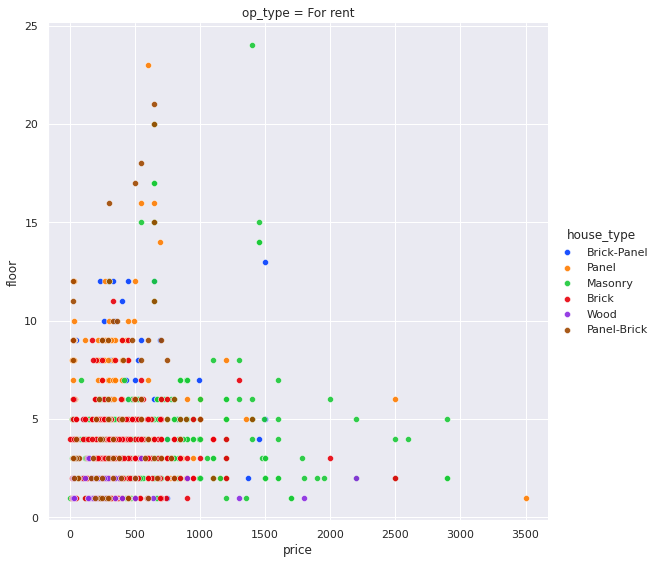

In [34]:
print(f'In the rental supply the most objects are in Brick and Panel_Brick houses on the 1st to 9th floor with price up to 700 Eur.')
g = sns.FacetGrid(For_rent, col="op_type", hue="house_type", height=8,  aspect=.99, palette ='bright')
g.map(sns.scatterplot, "price", "floor", alpha=.9)
g.add_legend()

We can see that most objects are offered on the 2nd floor, and from 10 floors and above the supply is reduced to a minimum


Text(0, 0.5, 'Objects')

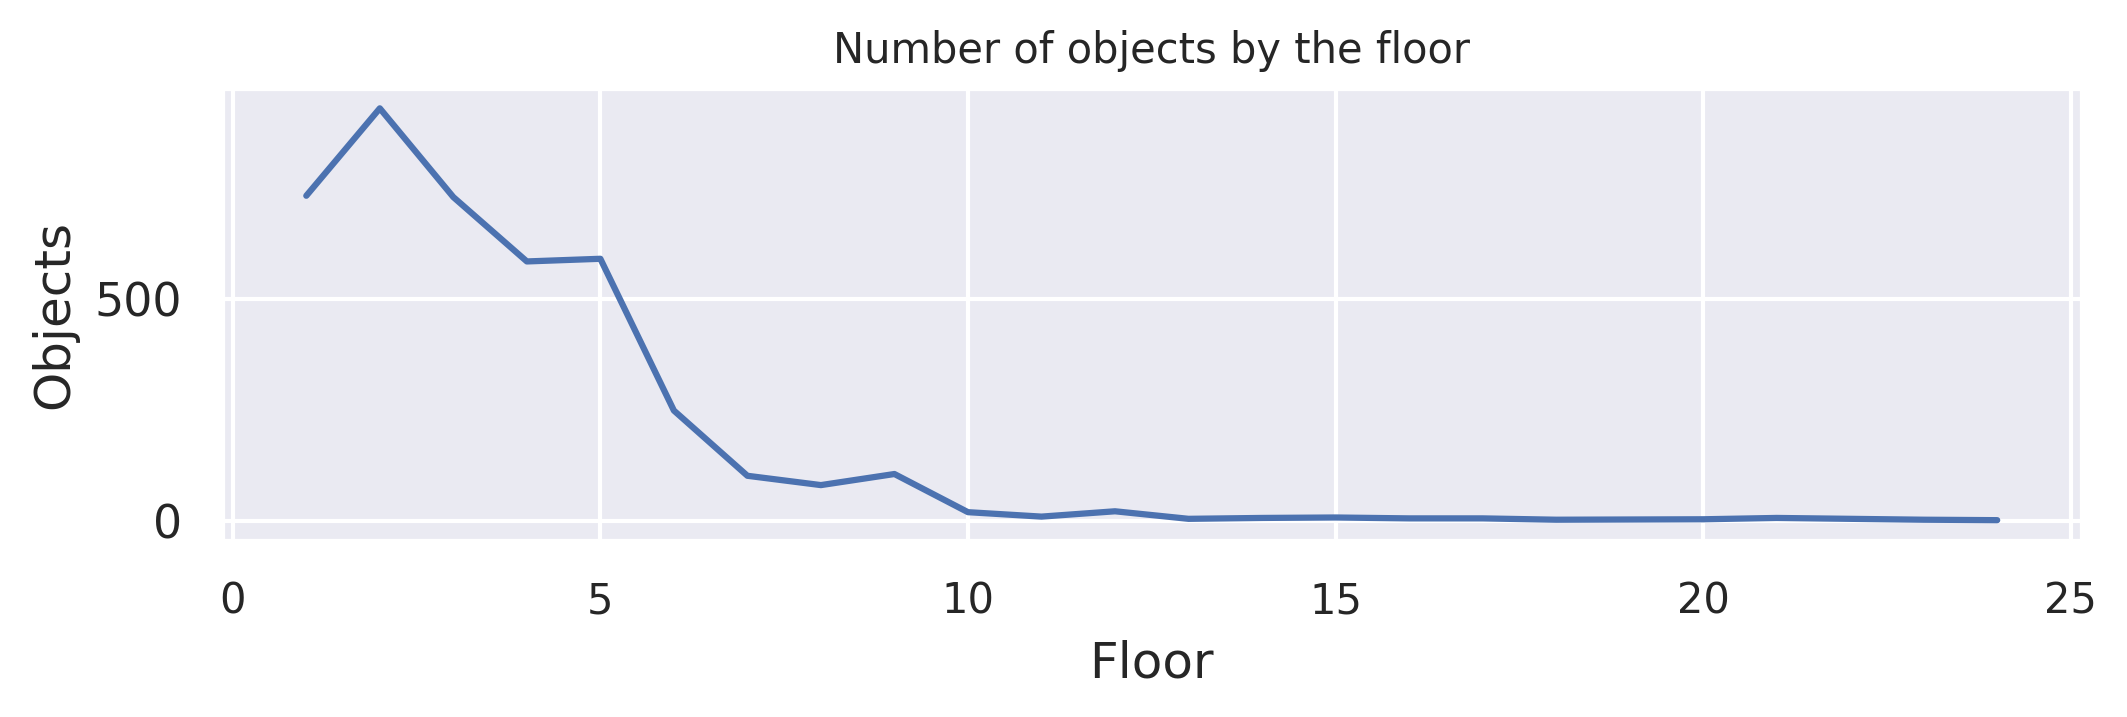

In [35]:
print(f'We can see that most objects are offered on the 2nd floor, and from 10 floors and above the supply is reduced to a minimum')
floor_value_counts = rre['floor'].value_counts()
line,ax = plt.subplots(figsize=(8,2), dpi=300)
floor_value_counts = sns.lineplot(data=floor_value_counts)
plt.xticks(rotation=0, size = 10)

floor_value_counts.set_title("Number of objects by the floor", fontsize=10)
floor_value_counts.set_xlabel ("Floor")
floor_value_counts.set_ylabel ("Objects")

I want to look at the selling price per square meter by floor and confirm or refute the hypothesis that the apartments sold on the 1st floor are the cheapest.

So, we see that the sale price of the dwellings on the 1st floor is indeed at the lower limit, but also on the 8th, 9th and 11th floors the same low price as on the first floor.
However, the rental price by the first floor is not affected at all. Price fluctuations start only from the 8th floor.



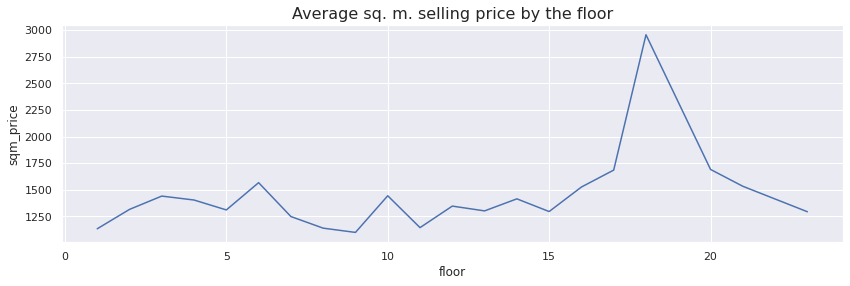

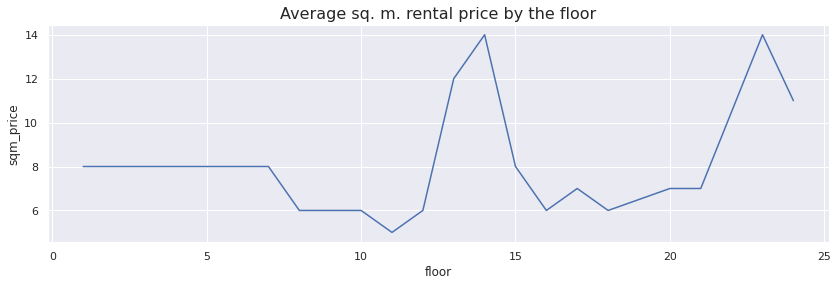

In [36]:
print(f'I want to look at the selling price per square meter by floor and confirm or refute the hypothesis that the apartments sold on the 1st floor are the cheapest.')
print()
print(f'So, we see that the sale price of the dwellings on the 1st floor is indeed at the lower limit, but also on the 8th, 9th and 11th floors the same low price as on the first floor.')
print(f'However, the rental price by the first floor is not affected at all. Price fluctuations start only from the 8th floor.')
fs_sqmp_mean = round(For_sale.groupby(['floor'])['sqm_price'].mean())

line,ax = plt.subplots(figsize=(14,4))
sns.lineplot(data=fs_sqmp_mean, palette='dark')
ax.set_title ("Average sq. m. selling price by the floor", size=16)

fr_sqmp_mean = round(For_rent.groupby(['floor'])['sqm_price'].mean())
line,ax = plt.subplots(figsize=(14,4))
sns.lineplot(data=fr_sqmp_mean, palette='dark')
ax.set_title ("Average sq. m. rental price by the floor", size=16)
print()

I want to see how the price changes as the housing area changes. I guess as the area increases, so does the price.
However, according to the graph, we can see that the curve is quite wavy.
I think this is because the price is also affected by  the type of house, the area, and the floor.


Text(0, 0.5, 'Price Eur')

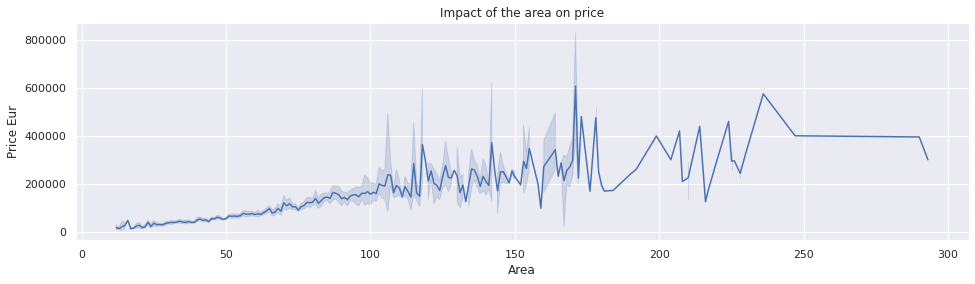

In [37]:
print(f'I want to see how the price changes as the housing area changes. I guess as the area increases, so does the price.\nHowever, according to the graph, we can see that the curve is quite wavy.')
print(f'I think this is because the price is also affected by  the type of house, the area, and the floor.')
line,ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=For_sale, x="area", y="price")

plt.title("Impact of the area on price")
ax.set_xlabel ("Area")
ax.set_ylabel ("Price Eur")

In [38]:
print(f'To be more precise, I filtered out only 50 sq.m. average house prices - the obvious price difference can be seen here, although the housing area is identical.')
area50 = For_sale[For_sale['area']==50]
grouped_area50=area50.groupby('house_type').price.mean()
round(grouped_area50,2)

To be more precise, I filtered out only 50 sq.m. average house prices - the obvious price difference can be seen here, although the housing area is identical.


house_type
Brick          66371.43
Brick-Panel    55500.00
Masonry        71586.79
Panel          48775.96
Panel-Brick    48100.00
Wood           60000.00
Name: price, dtype: float64

So, the filtering out of different types of houses showed that the type of house significantly influences the price.


Text(0, 0.5, 'Price Eur')

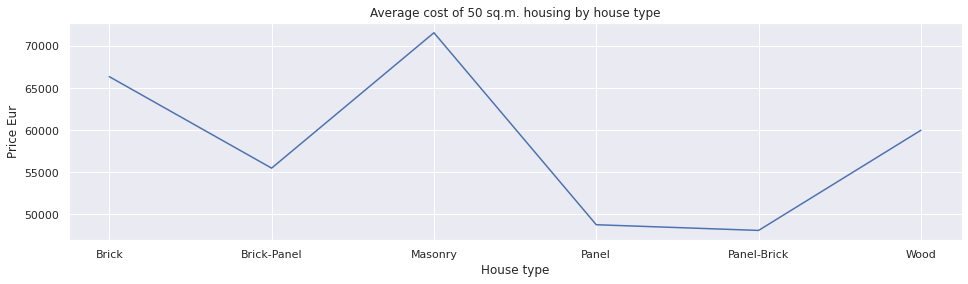

In [39]:
print(f'So, the filtering out of different types of houses showed that the type of house significantly influences the price.')
line,ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=grouped_area50)
plt.title("Average cost of 50 sq.m. housing by house type")
ax.set_xlabel ("House type")
ax.set_ylabel ("Price Eur")

Below we can review what the average area is offered in each area.
We see that we would have almost no choice if we were looking for housing over 100 sq.m., whether buying or renting - the offer is very limited.


Text(0, 0.5, 'Area sq.m.')

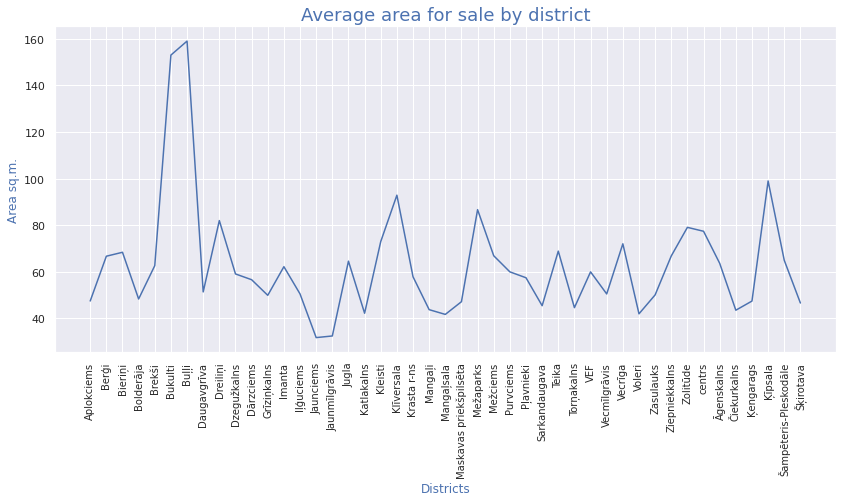

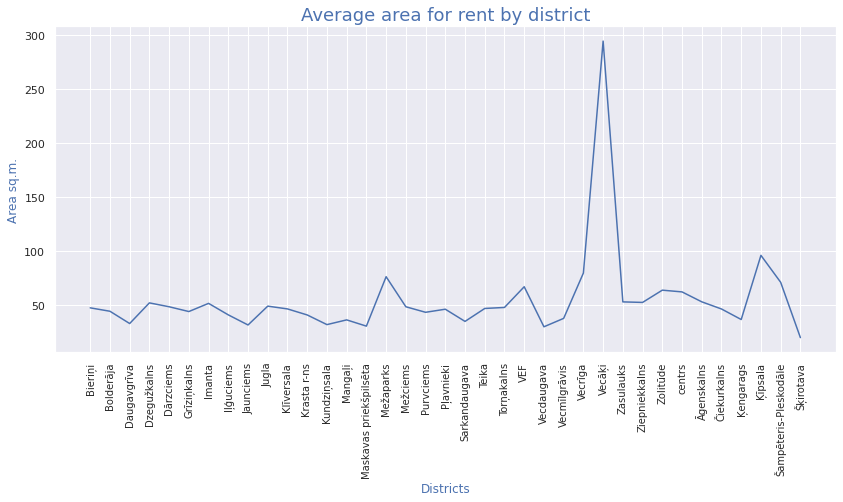

In [40]:
print(f'Below we can review what the average area is offered in each area.')
print(f'We see that we would have almost no choice if we were looking for housing over 100 sq.m., whether buying or renting - the offer is very limited.')
district_by_area_mean_for_sale=For_sale.groupby('district').area.mean()

line,ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=district_by_area_mean_for_sale, palette = "bright")
plt.xticks(rotation=90, size = 10)
ax.set_title ("Average area for sale by district", size = 18, color = 'b')
ax.set_xlabel ("Districts", size = 12, color = 'b')
ax.set_ylabel ("Area sq.m.", size = 12, color = 'b')

district_by_area_mean_for_rent=For_rent.groupby('district').area.mean()

line,ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=district_by_area_mean_for_rent, palette = "bright")
plt.xticks(rotation=90, size = 10)
ax.set_title ("Average area for rent by district", size = 18, color = 'b')
ax.set_xlabel ("Districts", size = 12, color = 'b')
ax.set_ylabel ("Area sq.m.", size = 12, color = 'b')

In [41]:
print(f"Let's see how many objects are offered with all amenities, partial and no amenities at all.")
rre.groupby('condition').price.count()

Let's see how many objects are offered with all amenities, partial and no amenities at all.


condition
All amenities        4004
Partial amenities     171
Without amenities      13
Name: price, dtype: int64

Text(0.5, 1.0, 'Number of objects according to the offered amenities')

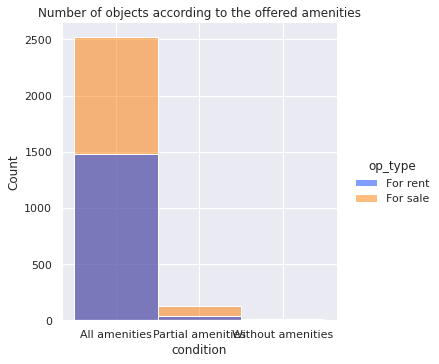

In [42]:
sns.displot(data=rre, x='condition', hue='op_type', palette = 'bright')         
plt.title("Number of objects according to the offered amenities")

In [43]:
print(f'Although only 13 objects are offered without amenities, I want to test another hypothesis that objects with all amenities are more expensive, with partial amenities - cheaper, and without all amenities - the cheapest. However, we see that the price of objects without amenities is not lower, but higher than with partial amenities.')
print(f'Why is that? These prices are likely to be influenced by other factors, e.g. district.')
condition=rre.groupby('condition').price.mean()
condition

Although only 13 objects are offered without amenities, I want to test another hypothesis that objects with all amenities are more expensive, with partial amenities - cheaper, and without all amenities - the cheapest. However, we see that the price of objects without amenities is not lower, but higher than with partial amenities.
Why is that? These prices are likely to be influenced by other factors, e.g. district.


condition
All amenities        60124.053197
Partial amenities    18579.514620
Without amenities    48183.000000
Name: price, dtype: float64

Since I have just looked at the prices without distinguishing whether it is a rented or sold object, this information should be distinguished.
I look at the data of objects for sale and rent and I see that the situation with objects for sale remains the same - apartments without any amenities are somehow cheaper than with partial amenities, but there are no options in the rental offer without amenities at all.


Text(0, 0.5, 'Price Eur')

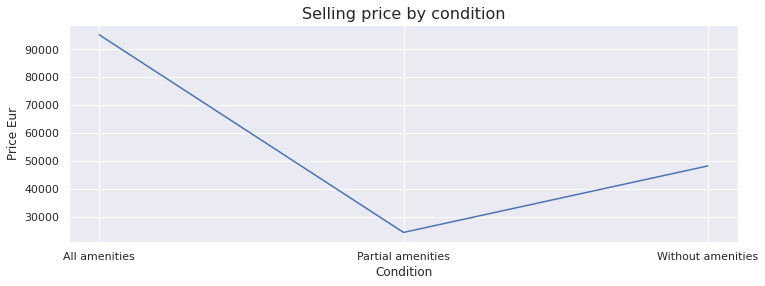

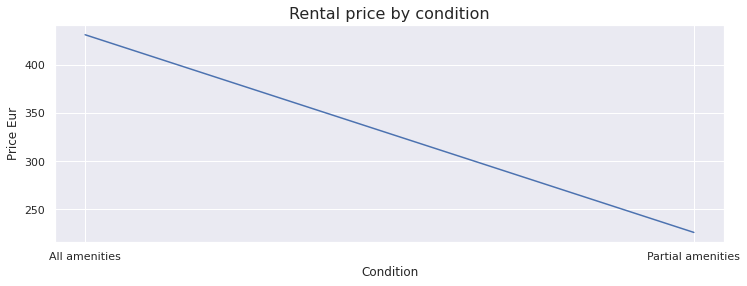

In [44]:
print(f'Since I have just looked at the prices without distinguishing whether it is a rented or sold object, this information should be distinguished.')
print(f'I look at the data of objects for sale and rent and I see that the situation with objects for sale remains the same - apartments without any amenities are somehow cheaper than with partial amenities, but there are no options in the rental offer without amenities at all.')

condition_fs=For_sale.groupby('condition').price.mean()

line,ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=condition_fs, palette='pastel')
ax.set_title ("Selling price by condition", size=16)
ax.set_xlabel ("Condition")
ax.set_ylabel ("Price Eur")

condition_fr=For_rent.groupby('condition').price.mean()

line,ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=condition_fr, palette='pastel')
ax.set_title ("Rental price by condition", size=16)
ax.set_xlabel ("Condition")
ax.set_ylabel ("Price Eur")

In [45]:
print(f'After performing this analysis, I found out that the largest supply of objects for sale and for rent is in the center. These are usually 2-room dwellings on the 2nd floor of a brick house.') 
print()
print(f'The average price for sale is 91483 Eur, for rent - 426 Eur.') 
print(f'The lowest average housing sale price is in Jaunmīlgrāvis district - 12250 Eur. The largest - in Klīversala district - 287974 Eur.')
print(f'Lowest average rental price in Šķirotava district for 140 Eur, the highest - in Ķīpsala district - 1308.')
print()
print(f'I found out that the floor of the house affects the price of the objects for sale - the houses on the 1st floor are cheaper. Housing on the 8th, 9th and 11th floors also falls into the category of cheaper. From the 12th floor up, the price goes up a bit. But the price of rented housing is not affected at all by the first floor. The rental price remains stable from the 1st to the 7th floor inclusive. The largest supply on the market is housing from 1 to 6 floors.')
print()     
print(f'The type of house also has an obvious effect on the price - Masonry is the most expensive house type and Wood houses are the cheapest. The most expensive rental is in a Masonry house type and the cheapest in a Panel house type.')
print(f'According to this dataset, there are no homes without amenities in the rental offer at all.')
print(f'The fact that there are no amenities at all does not lower the purchase price - housing without amenities is even cheaper than with partial amenities.')

After performing this analysis, I found out that the largest supply of objects for sale and for rent is in the center. These are usually 2-room dwellings on the 2nd floor of a brick house.

The average price for sale is 91483 Eur, for rent - 426 Eur.
The lowest average housing sale price is in Jaunmīlgrāvis district - 12250 Eur. The largest - in Klīversala district - 287974 Eur.
Lowest average rental price in Šķirotava district for 140 Eur, the highest - in Ķīpsala district - 1308.

I found out that the floor of the house affects the price of the objects for sale - the houses on the 1st floor are cheaper. Housing on the 8th, 9th and 11th floors also falls into the category of cheaper. From the 12th floor up, the price goes up a bit. But the price of rented housing is not affected at all by the first floor. The rental price remains stable from the 1st to the 7th floor inclusive. The largest supply on the market is housing from 1 to 6 floors.

The type of house also has an obvious effect